# Dealing with imbalanced data

In this section, we will apply some SMOTE techniques to the training data in order to solve the highly imbalanced data problem.

We will try several SMOTE techniques to generate some datasets. Then, these datasets will be compared according to their data-quality metrics (using `problexity` library)

The SMOTE techniques that we will use are:
- **Borderline SMOTE** (over-sampling the minority class reinforcing the border between the classes)
- **ADASYN** (Adaptive Synthetic Sampling: focuses on generating samples of minotiy class that are harder to classify)
- **SMOTE-TL** (SMOTE Tomek Links: combines over-sampling of the minority class with under-sampling of the majority class by removing Tomek links)
- **SMOTE-ENN** (SMOTE Edited Nearest Neighbors: combines over-sampling of the minority class with under-sampling of the majority class by cleaning the majority class with ENN)
- **SVM-SMOTE** (SMOTE Support Vector Machine: uses SVM to generate synthetic samples)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import problexity as pbx
from imblearn.over_sampling import BorderlineSMOTE, ADASYN, SVMSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

In [2]:
df = pd.read_csv('../data/customer_cleaned.csv')
df.head()

,sex,is_employed,income,health_ins,num_vehicles,age,state_of_res,gas_usage,rooms,marital_status_Divorced/Separated,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner free and clear,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented
0,1,1,-0.34,1,0.00,0.04,0.0,2.71,0.4,0,0,1,0,1,0,0,0
1,0,0,-0.32,1,0.00,0.78,0.0,-0.60,1.0,1,0,0,0,0,0,0,1
2,0,1,-0.36,1,0.33,0.13,0.0,-0.01,0.4,0,0,1,0,0,1,0,0
3,0,0,-0.07,1,0.17,0.92,0.0,1.27,0.2,0,0,0,1,1,0,0,0
4,1,1,-0.05,1,0.33,0.59,0.0,-0.60,0.2,1,0,0,0,0,0,0,1


In [3]:
X = df.drop('health_ins', axis=1)
y = df['health_ins']

In [11]:
def print_target_dist(y, dataset_name):
    print(f"Frequency in {dataset_name} dataset: {y.value_counts()}")
    print(f"Percentage in {dataset_name} dataset: {y.value_counts(normalize=True).round(3)}")

In [12]:
# Number of cases and percentage of each class in the original dataset
print_target_dist(y, 'original')

Frequency in original dataset: health_ins
1    65553
0     6905
Name: count, dtype: int64
Percentage in original dataset: health_ins
1    0.905
0    0.095
Name: proportion, dtype: float64


## SMOTE Edited Nearest Neighbors (SMOTE-ENN)

In [15]:
X_smoteenn, y_smoteenn = SMOTEENN(random_state=42,n_jobs=-1).fit_resample(X, y)
print_target_dist(y_smoteenn, 'SMOTE-ENN')

/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Frequency in SMOTE-ENN dataset: health_ins
0    60165
1    44845
Name: count, dtype: int64
Percentage in SMOTE-ENN dataset: health_ins
0    0.573
1    0.427
Name: proportion, dtype: float64


## SMOTE Tomek Links (SMOTE-TL)

In [17]:
X_smotetl, y_smotetl = SMOTETomek(random_state=42,n_jobs=-1).fit_resample(X, y)
print_target_dist(y_smotetl, 'SMOTE-TomekLinks')

/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Frequency in SMOTE-TomekLinks dataset: health_ins
1    64824
0    64824
Name: count, dtype: int64
Percentage in SMOTE-TomekLinks dataset: health_ins
1    0.5
0    0.5
Name: proportion, dtype: float64


## Borderline SMOTE

In [18]:
X_borderline, y_borderline = BorderlineSMOTE(random_state=42,n_jobs=-1).fit_resample(X, y)
print_target_dist(y_borderline, 'BorderlineSMOTE')

/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/imblearn/over_sampling/_smote/filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Frequency in BorderlineSMOTE dataset: health_ins
1    65553
0    65553
Name: count, dtype: int64
Percentage in BorderlineSMOTE dataset: health_ins
1    0.5
0    0.5
Name: proportion, dtype: float64


## Borderline SMOTE over SMOTE-ENN

In [23]:
X_enn_borderline, y_enn_borderline = BorderlineSMOTE(random_state=42,n_jobs=-1).fit_resample(X_smoteenn, y_smoteenn)
print_target_dist(y_enn_borderline, 'SMOTE-ENN + BorderlineSMOTE')

/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/imblearn/over_sampling/_smote/filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Frequency in SMOTE-ENN + BorderlineSMOTE dataset: health_ins
0    60165
1    60165
Name: count, dtype: int64
Percentage in SMOTE-ENN + BorderlineSMOTE dataset: health_ins
0    0.5
1    0.5
Name: proportion, dtype: float64


## ADASYN

In [19]:
X_adasyn, y_adasyn = ADASYN(random_state=42,n_jobs=-1).fit_resample(X, y)
print_target_dist(y_adasyn, 'ADASYN')

/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Frequency in ADASYN dataset: health_ins
0    66372
1    65553
Name: count, dtype: int64
Percentage in ADASYN dataset: health_ins
0    0.503
1    0.497
Name: proportion, dtype: float64


## SVM-SMOTE

In [20]:
X_svm_smote, y_svm_smote = SVMSMOTE(random_state=42,n_jobs=-1).fit_resample(X, y)
print_target_dist(y_svm_smote, 'SVM-SMOTE')

/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/imblearn/over_sampling/_smote/filter.py:437: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Frequency in SVM-SMOTE dataset: health_ins
1    65553
0    65553
Name: count, dtype: int64
Percentage in SVM-SMOTE dataset: health_ins
1    0.5
0    0.5
Name: proportion, dtype: float64


## Comparison of the datasets

In [24]:
datasets = {
    'smote-enn': (X_smoteenn, y_smoteenn),
    'borderline': (X_borderline, y_borderline),
    'smote-tl': (X_smotetl, y_smotetl),
    'enn-borderline': (X_enn_borderline, y_enn_borderline),
    'adasyn-smote': (X_adasyn, y_adasyn),
    'svm-smote': (X_svm_smote, y_svm_smote)
}

fb_measures = pd.DataFrame([], columns=['dataset', 'f1', 'f2', 'f3', 'f4'])

for dataset, (X, y) in datasets.items():
    print(f'Calculating metrics for {dataset}')
    f1 = round(pbx.f1(X, y),3)
    f2 = round(pbx.f2(X, y),3)
    f3 = round(pbx.f3(X, y),3)
    f4 = round(pbx.f4(X, y),3)
    fb_measures.loc[len(fb_measures)] = [dataset, f1, f2, f3, f4]

fb_measures

Calculating metrics for smote-enn
Calculating metrics for borderline
Calculating metrics for smote-tl
Calculating metrics for enn-borderline
Calculating metrics for adasyn-smote
Calculating metrics for svm-smote


,dataset,f1,f2,f3,f4
0,smote-enn,0.677,0.279,0.996,0.996
1,borderline,0.769,0.286,0.997,0.997
2,smote-tl,0.796,0.286,0.997,0.997
3,enn-borderline,0.766,0.279,0.996,0.996
4,adasyn-smote,0.814,0.286,0.997,0.997
5,svm-smote,0.752,0.136,0.979,0.952


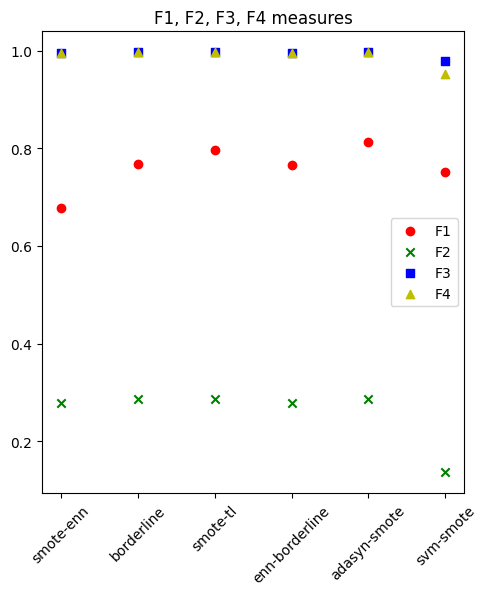

In [25]:
# Plot feature based measures
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(fb_measures['dataset'], fb_measures['f1'], color='r', label='F1', marker='o')
plt.scatter(fb_measures['dataset'], fb_measures['f2'], color='g', label='F2', marker='x')
plt.scatter(fb_measures['dataset'], fb_measures['f3'], color='b', label='F3', marker='s')
plt.scatter(fb_measures['dataset'], fb_measures['f4'], color='y', label='F4', marker='^')
plt.xticks(rotation=45)
plt.legend()
plt.title('F1, F2, F3, F4 measures')
plt.show()

Remembering the meaning of each measure:
- **F1**: class separability
- **F2**: feature overlap
- **F3**: best single feature
- **F4**: combined feature effectiveness

The objective is to find a good trade-off between high F1 and low F2.

In [26]:
# Choose SVM-SMOTE as the best resampling method
df = pd.concat([X_svm_smote, y_svm_smote], axis=1)
df.shape

(131106, 17)